### Code to generate the data:
python -m grid --n 4 matern "python SVC.py --dataset interface --dist normal --test 1 --pte 10000 --kernel matern --sigma 100" --seed 0 1 2 3 4 5 6 7 8 9 --d 2 3 5 10 --nu 0.1 0.3 0.5 0.7 0.9 --ptr 50 85 144 243 411 696 1179 2000 3100 4640 6810 8000 10000

### Figures for the paper

In [1]:
import os
import sys
sys.path.append("../")
import numpy as np
import utils

import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
rc('text', usetex=True)
rcParams['font.family'] = 'DejaVu Sans'
from matplotlib.patches import Patch 
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid.inset_locator import (inset_axes, InsetPosition, mark_inset)
import matplotlib.cm as cm

/home/jonas/local/py3/lib/python3.6/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  del sys.path[0]


#### figures for $\alpha$

In [2]:
name = "matern"
ds = utils.get_argument(name, "d")
nus = utils.get_argument(name, "nu")

data = {
    "alpha": dict(), 
    "Delta": dict(),
    "err": dict()
       }
for d in ds:
    for nu in nus:
        dic = {"d": d, "nu": nu}
        alpha = utils.get_alpha(name, dic)
        Delta = utils.get_Delta(name, dic)
        err = utils.get_test_error(name, dic)
        data["alpha"][d, nu] = utils.class_data(alpha, dic, "ptr")
        data["Delta"][d, nu] = utils.class_data(Delta, dic, "ptr")
        data["err"][d, nu] = utils.class_data(err, dic, "ptr")

<IPython.core.display.Javascript object>


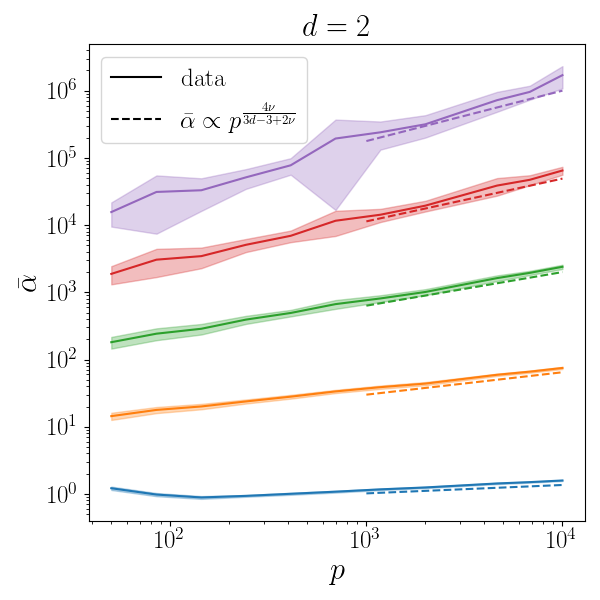

In [3]:
%matplotlib notebook

d = 2 # 2, 3, 5, 10
nus = [0.1, 0.3, 0.5, 0.7, 0.9]

label1 = [Line2D([0], [0], color='k', Linestyle='-', label=r"data"),
          Line2D([0], [0], color='k', Linestyle='--', label=r"$\bar\alpha \propto p^{\frac{4\nu}{3d-3+2\nu}}$")]
label2 = [Patch(facecolor="C{}".format(i), label=r"$\nu$={}".format(nu)) for i, nu in enumerate(nus)]
labels = label1 + label2

pf = {
    2: {0.1: 0.43, 0.3: 3., 0.5: 20, 0.7: 140, 0.9: 1000},
    3: {0.1: 0.92, 0.3: 5.2, 0.5: 28, 0.7: 140, 0.9: 700},
    5: {0.1: 1.1, 0.3: 5.4, 0.5: 25, 0.7: 110, 0.9: 450},
    10: {0.1: 1.1, 0.3: 4.9, 0.5: 20, 0.7: 78, 0.9: 280},
}

fig, ax = plt.subplots(figsize=(6, 6))

for i, nu in enumerate(nus):    
    ps, means = utils.get_mean(data["alpha"][d, nu])
    ps, stds = utils.get_std(data["alpha"][d, nu])
    ax.plot(ps, means, color="C{}".format(i))
    ax.fill_between(ps, means - stds / 2, means + stds / 2, color="C{}".format(i), alpha=0.3)
    #benchmark
    x = np.linspace(1e3, 1e4)
    y = pf[d][nu] * x ** (4 * nu / (3 * d - 3 + 2 * nu))
    ax.plot(x, y, color="C{}".format(i), Linestyle='--')

ax.set_xlabel(r"$p$", fontsize=22)
ax.set_ylabel(r"$\bar\alpha$", fontsize=22)
ax.set(xscale='log', yscale='log')
ax.tick_params(labelsize=18)

plt.legend(handles=label1, loc="upper left", fontsize=18)
plt.title(r"$d={}$".format(d), fontsize=22)
plt.tight_layout()
#plt.savefig("path_to_figure".format(d), format="pdf")

<IPython.core.display.Javascript object>


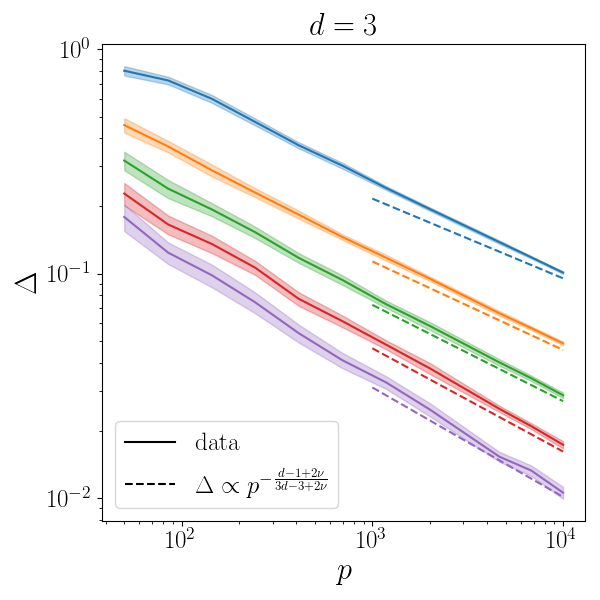

In [5]:
%matplotlib notebook

d = 3 # 2, 3, 5, 10
nus = [0.1, 0.3, 0.5, 0.7, 0.9]
label1 = [Line2D([0], [0], color='k', Linestyle='-', label=r"data"),
          Line2D([0], [0], color='k', Linestyle='--', label=r"$\Delta \propto p^{-\frac{d-1+2\nu}{3d-3+2\nu}}$")]
label2 = [Patch(facecolor="C{}".format(i), label=r"$\nu$={}".format(nu)) for i, nu in enumerate(nus)]
labels = label1 + label2

pf = {
    2: {0.1: 4, 0.3: 1.6, 0.5: 1.35, 0.7: 1.1, 0.9: 0.9},
    3: {0.1: 2.5, 0.3: 1.72, 0.5: 1.4, 0.7: 1.11, 0.9: 0.9},
    5: {0.1: 3.2, 0.3: 2.1, 0.5: 1.65, 0.7: 1.3, 0.9: 1.05},
    10: {0.1: 4.12, 0.3: 2.7, 0.5: 2.05, 0.7: 1.62, 0.9: 1.27},
}

fig, ax = plt.subplots(figsize=(6, 6))

for i, nu in enumerate(nus):    
    ps, means = utils.get_mean(data["Delta"][d, nu])
    ps, stds = utils.get_std(data["Delta"][d, nu])
    ax.plot(ps, means, color="C{}".format(i))
    ax.fill_between(ps, means - stds / 2, means + stds / 2, color="C{}".format(i), alpha=0.3)
    
    x = np.linspace(1e3, 1e4)
    y = pf[d][nu] * x ** (-(d - 1 + 2 * nu) / (3 * d - 3 + 2 * nu))
    ax.plot(x, y, color="C{}".format(i), Linestyle='--')

ax.set_xlabel(r"$p$", fontsize=22)
ax.set_ylabel(r"$\Delta$", fontsize=22)
ax.set(xscale='log', yscale='log')
ax.tick_params(labelsize=18)

plt.legend(handles=label1, loc="lower left", fontsize=18)
plt.title(r"$d={}$".format(d), fontsize=22)
plt.tight_layout()
#plt.savefig("path_to_figure".format(d), format="pdf")

<IPython.core.display.Javascript object>


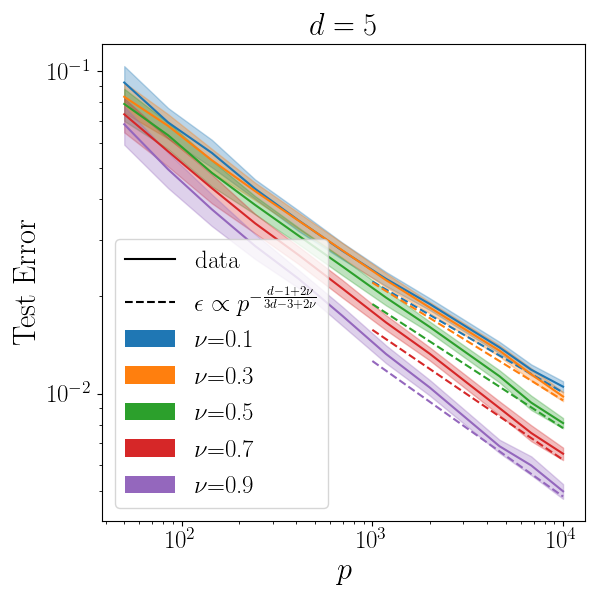

In [6]:
%matplotlib notebook

d = 5 # 2, 3, 5, 10
nus = [0.1, 0.3, 0.5, 0.7, 0.9]
label1 = [Line2D([0], [0], color='k', Linestyle='-', label=r"data"),
          Line2D([0], [0], color='k', Linestyle='--', label=r"$\epsilon \propto p^{-\frac{d-1+2\nu}{3d-3+2\nu}}$")]
label2 = [Patch(facecolor="C{}".format(i), label=r"$\nu$={}".format(nu)) for i, nu in enumerate(nus)]
labels = label1 + label2

pf = {
    2: {0.1: .1, 0.3: .17, 0.5: .24, 0.7: .25, 0.9: .22},
    3: {0.1: .185, 0.3: .25, 0.5: .265, 0.7: .26, 0.9: .235},
    5: {0.1: .24, 0.3: .275, 0.5: .27, 0.7: .255, 0.9: .23},
    10: {0.1: .26, 0.3: .28, 0.5: .28, 0.7: .25, 0.9: .23},
}

fig, ax = plt.subplots(figsize=(6, 6))

for i, nu in enumerate(nus):    
    ps, means = utils.get_mean(data["err"][d, nu])
    ps, stds = utils.get_std(data["err"][d, nu])
    ax.plot(ps, means, color="C{}".format(i))
    ax.fill_between(ps, means - stds / 2, means + stds / 2, color="C{}".format(i), alpha=0.3)
    
    x = np.linspace(1e3, 1e4)
    y = pf[d][nu] * x ** (-(d - 1 + 2 * nu) / (3 * d - 3 + 2 * nu))
    ax.plot(x, y, color="C{}".format(i), Linestyle='--')

ax.set_xlabel(r"$p$", fontsize=22)
ax.set_ylabel(r"Test Error", fontsize=22)
ax.set(xscale='log', yscale='log')
ax.tick_params(labelsize=18)

plt.legend(handles=labels, loc="lower left", fontsize=18)
plt.title(r"$d={}$".format(d), fontsize=22)
plt.tight_layout()
#plt.savefig("path_to_figure", format="pdf")